<a href="https://colab.research.google.com/github/saivenkatreddy29/TensorFlow-Learning/blob/main/nlp_final_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25
Receiving objects: 100% (39/39), 177.08 MiB | 14.91 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (13/13), done.
PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [2]:
# Check what files are in the PubMed_20K dataset
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


In [3]:

# Start by using the 20k dataset
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [4]:
import os
file_names = [data_dir + i for i in os.listdir(data_dir)]

# **Preprocessing Data**

In [5]:
file_names

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt']

In [6]:
def lines(dir):
    file = open(dir,"r")
    data = file.readlines()
    return data

In [7]:
train_data = lines('pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt')
val_data = lines('pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt')
test_data = lines('pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt')
train_data[:10]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [8]:
val_data[1], test_data[1]

('BACKGROUND\tIgE sensitization to Aspergillus fumigatus and a positive sputum fungal culture result are common in patients with refractory asthma .\n',
 'BACKGROUND\tThis study analyzed liver function abnormalities in heart failure patients admitted with severe acute decompensated heart failure ( ADHF ) .\n')

In [9]:
test_data[:10]

['###24845963\n',
 'BACKGROUND\tThis study analyzed liver function abnormalities in heart failure patients admitted with severe acute decompensated heart failure ( ADHF ) .\n',
 'RESULTS\tA post hoc analysis was conducted with the use of data from the Evaluation Study of Congestive Heart Failure and Pulmonary Artery Catheterization Effectiveness ( ESCAPE ) .\n',
 'RESULTS\tLiver function tests ( LFTs ) were measured at @ time points from baseline , at discharge , and up to @ months follow-up .\n',
 'RESULTS\tSurvival analyses were used to assess the association between admission Model of End-Stage Liver Disease Excluding International Normalized Ratio ( MELD-XI ) scores and patient outcome.There was a high prevalence of abnormal baseline ( admission ) LFTs ( albumin @ % , aspartate transaminase @ % , alanine transaminase @ % , and total bilirubin @ % ) .\n',
 "RESULTS\tThe percentage of patients with abnormal LFTs decreased significantly from baseline to @-months ' follow-up .\n",
 'RE

In [10]:
def preprocessing_text(filename):

    input_lines = lines(filename)
    abstract_lines = " "
    abstract_samples = []

    for line in input_lines:
        if line.startswith('###'):
            abstract_id = line
            abstract_lines = ""
        elif line.isspace():
            abstract_line_split = abstract_lines.splitlines()

            for abstract_line_number,abstract_line in enumerate (abstract_line_split):
                line_data = {}
                target_text_split = abstract_line.split('\t')
                line_data['target'] = target_text_split[0]
                line_data['text'] = target_text_split[1]
                line_data['line_number'] = abstract_line_number
                line_data['total_lines'] = len(abstract_line_split)-1
                abstract_samples.append(line_data)
        else:
            abstract_lines += line
    return abstract_samples





In [11]:
train_samples = preprocessing_text(data_dir + "train.txt")
val_samples = preprocessing_text(data_dir + "dev.txt") # dev is another name for validation set
test_samples = preprocessing_text(data_dir + "test.txt")
len(train_samples), len(val_samples), len(test_samples)

(180040, 30212, 30135)

In [12]:
train_samples[:10]

[{'target': 'OBJECTIVE',
  'text': 'To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'Pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'Secondary outcome measures included the Western Ontari

In [13]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
test_df = pd.DataFrame(test_samples)
val_df = pd.DataFrame(val_samples)

In [14]:
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,To investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,A total of @ patients with primary knee OA wer...,1,11
2,METHODS,Outcome measures included pain reduction and i...,2,11
3,METHODS,Pain was assessed using the visual analog pain...,3,11
4,METHODS,Secondary outcome measures included the Wester...,4,11


<Axes: ylabel='Frequency'>

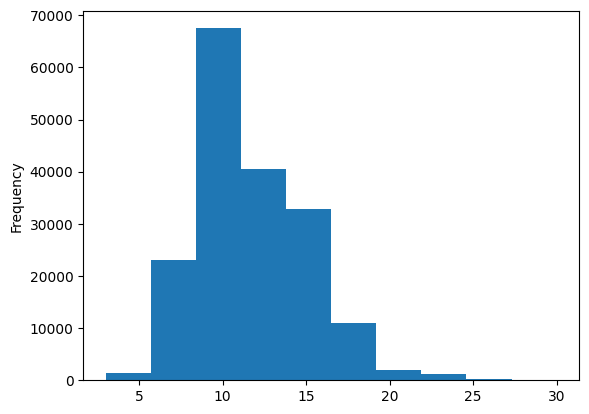

In [15]:
train_df.total_lines.plot.hist()

In [16]:
train_sentences = train_df['text'].tolist()
test_sentences = test_df['text'].tolist()
val_sentences = val_df['text'].tolist()

In [17]:
train_labels = train_df['target'].to_numpy()
test_labels = test_df['target'].to_numpy()
val_labels = val_df['target'].to_numpy()

In [18]:
train_labels[:10]

array(['OBJECTIVE', 'METHODS', 'METHODS', 'METHODS', 'METHODS', 'METHODS',
       'RESULTS', 'RESULTS', 'RESULTS', 'RESULTS'], dtype=object)

In [19]:
train_sentences[:10]

['To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .',
 'A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'Pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .',
 'Serum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured .',
 'There was a clinic

# **Make numerical Labels**

In [20]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse = False)

train_labels_onehot = encoder.fit_transform(train_labels.reshape(-1,1))
test_labels_onehot = encoder.fit_transform(test_labels.reshape(-1,1))
val_labels_onehot = encoder.fit_transform(val_labels.reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [21]:
train_labels_onehot[:1]

array([[0., 0., 0., 1., 0.]])

# **Labeled Encoding**

In [22]:
from sklearn.preprocessing import LabelEncoder
labelenc = LabelEncoder()

In [23]:
train_label_encoder = labelenc.fit_transform(train_labels.reshape(-1,1))
test_label_encoder = labelenc.fit_transform(test_labels.reshape(-1,1))
val_label_encoder = labelenc.fit_transform(val_labels.reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
train_label_encoder[:1]

array([3])

In [25]:
val_label_encoder[:10]

array([0, 0, 3, 2, 2, 4, 4, 4, 4, 1])

# **Building a baseline model**

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

model_0 = Pipeline([

    ('tf-idf', TfidfVectorizer()),
    ('clf', MultinomialNB())
]
)

In [27]:
model_0.fit(train_sentences,train_label_encoder)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [28]:
acc0 = model_0.score(test_sentences,test_label_encoder)

In [29]:
acc0

0.716674962667994

In [34]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-08-10 01:23:57--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-08-10 01:23:57 (83.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [35]:
base_preds = model_0.predict(test_sentences)

In [36]:
from helper_functions import calculate_results

In [37]:
base_line_results = calculate_results(test_label_encoder, base_preds)
base_line_results

{'accuracy': 71.6674962667994,
 'precision': 0.7124322482375202,
 'recall': 0.716674962667994,
 'f1': 0.6925101703856846}

In [38]:
import pickle
with open('model0.pkl', 'wb') as f:
    pickle.dump(model_0, f)

In [39]:
base_preds.shape

(30135,)

In [40]:
test_label_encoder.shape

(30135,)

In [41]:

calculate_results(test_label_encoder,base_preds)

{'accuracy': 71.6674962667994,
 'precision': 0.7124322482375202,
 'recall': 0.716674962667994,
 'f1': 0.6925101703856846}

# **Preparing data for deep sequence models**

In [42]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers

In [43]:
leng = 0
sen_len = []
for sentence in train_sentences:
#     print(sentence.split())
#     print(len(sentence.split()))
#     break
    sen_len.append(len(sentence.split()))
avg = np.mean(sen_len)

In [44]:
avg,sen_len[:3]

(26.338269273494777, [49, 27, 15])

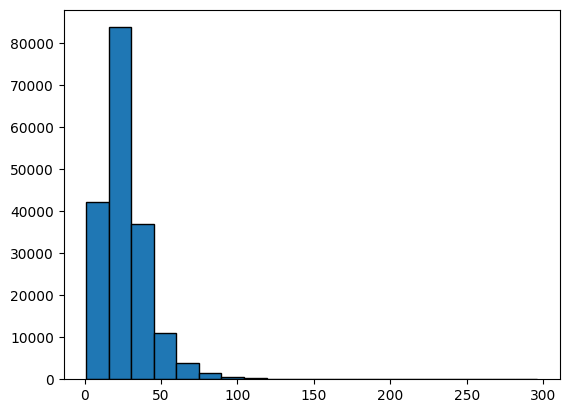

In [45]:
import matplotlib.pyplot as plt
plt.hist(sen_len, bins = 20, edgecolor='black');

# **Create a text vectorizer**

In [46]:
max_tokens = 68000

from tensorflow.keras.layers import TextVectorization
vectorizer = TextVectorization(
max_tokens=max_tokens,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    ngrams=None,
    output_mode='int',
output_sequence_length= 55)

In [47]:
vectorizer.adapt(train_sentences)

In [48]:
words = vectorizer.get_vocabulary()
words[:5]

['', '[UNK]', 'the', 'and', 'of']

In [49]:
vectorizer(train_sentences[1])

<tf.Tensor: shape=(55,), dtype=int64, numpy=
array([   8,   76,    4,   12,    7,   56,  517, 1743,    9,   29,   80,
        744,    4, 2535,    3,   80,   48,   11,   53,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0])>

In [50]:
vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

# **Create an Embedding layer**

In [51]:
from tensorflow.keras import layers

In [52]:
embedded = layers.Embedding(
 input_dim = len(words),
    output_dim = 128,
    embeddings_initializer='uniform',
mask_zero = True)

In [53]:
print(train_sentences[2])
print(vectorizer([train_sentences[2]]))

exp = embedded(vectorizer([train_sentences[2]]))
exp.shape

Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .
tf.Tensor(
[[ 86 213 121  65 169   3 194   5 149 119   3 670 636 747   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]], shape=(1, 55), dtype=int64)


TensorShape([1, 55, 128])

## **Creating Datasets**

In [54]:
import tensorflow as tf

In [55]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences,train_labels_onehot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences,test_labels_onehot))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences,val_labels_onehot))

In [56]:
train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [57]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [58]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [59]:
val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

# **Using Conv1D with token embeddings**

In [60]:
inputs = layers.Input((1,), dtype = tf.string)
x = vectorizer(inputs)
x = embedded(x)
x = layers.Conv1D(64,kernel_size = 5,padding = 'valid', activation = 'relu')(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(5, activation = 'softmax')(x)
model_1 = tf.keras.Model(inputs,outputs)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [61]:
model_1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization                   │ (None, 55)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 55, 128)             │       8,299,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 51, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,340,997 (31.82 MB)

 Trainable params: 8,340,997 (31.82 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model_1.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

In [63]:

# # Fit the model
# model_1_history = model_1.fit(train_dataset,
#                               steps_per_epoch=int(0.1 * len(train_dataset)), # only fit on 10% of batches for faster training time
#                               epochs=3,
#                               validation_data=val_dataset,
#                               validation_steps=int(0.1 * len(val_dataset))) # only validate on 10% of batches

In [64]:
model_1.fit(train_dataset, epochs = 5, steps_per_epoch = int(0.1 * len(train_dataset)), validation_data = (val_dataset),
           validation_steps = int(len(val_dataset)*0.1))

Epoch 1/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 57s 99ms/step - accuracy: 0.5168 - loss: 1.1758 - val_accuracy: 0.7237 - val_loss: 0.7249
Epoch 2/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 54s 96ms/step - accuracy: 0.7350 - loss: 0.7087 - val_accuracy: 0.7600 - val_loss: 0.6500
Epoch 3/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 54s 96ms/step - accuracy: 0.7595 - loss: 0.6459 - val_accuracy: 0.7862 - val_loss: 0.6110
Epoch 4/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 55s 97ms/step - accuracy: 0.7777 - loss: 0.6147 - val_accuracy: 0.7909 - val_loss: 0.5820
Epoch 5/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 54s 97ms/step - accuracy: 0.7858 - loss: 0.5986 - val_accuracy: 0.7912 - val_loss: 0.5784


In [65]:
acc1 = model_1.evaluate(test_dataset)

942/942 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7856 - loss: 0.5870


In [66]:
acc1

[0.5855897068977356, 0.7888833284378052]

In [67]:
model1_preds = model_1.predict(test_dataset)

942/942 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step


In [68]:
model_1.save('model1.h5')

In [69]:
model1_probs = tf.argmax(model1_preds,axis = 1)

In [70]:
model1_results = calculate_results(test_label_encoder, model1_probs)

In [71]:
model1_results

{'accuracy': 78.88833582213373,
 'precision': 0.7876275618399271,
 'recall': 0.7888833582213373,
 'f1': 0.7852161172881555}

# **Model 2 Feature Extraction using pre trained embedded layers**

In [72]:
import tensorflow_hub as hub
pre_embed = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                          trainable = False,
                          name = 'universal_sentence_encoder')

In [73]:
train_sentences[1]

'A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .'

In [74]:
pre_embed([train_sentences[1]]).shape

TensorShape([1, 512])

In [75]:
# Create a custom layer that wraps the Universal Sentence Encoder
class UniversalSentenceEncoder(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(UniversalSentenceEncoder, self).__init__(**kwargs)
        self.encoder = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

    def call(self, inputs):
        return self.encoder(inputs)

In [76]:
# # Define feature extractor model using TF Hub layer
# inputs = layers.Input(shape=[], dtype=tf.string)
# pretrained_embedding = pre_embed(inputs) # tokenize text and create embedding
# x = layers.Dense(128, activation="relu")(pretrained_embedding) # add a fully connected layer on top of the embedding
# # Note: you could add more layers here if you wanted to
# outputs = layers.Dense(5, activation="softmax")(x) # create the output layer
# model_2 = tf.keras.Model(inputs=inputs,
#                         outputs=outputs)

In [77]:
inputs = layers.Input(shape = [], dtype = tf.string)

x = UniversalSentenceEncoder()(inputs)
x = layers.Dense(128, activation = 'relu')(x)
outputs = layers.Dense(5, activation = 'softmax')(x)

model2 = tf.keras.Model(inputs,outputs)




In [78]:
model2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None)                      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ universal_sentence_encoder           │ (None, 512)                 │               0 │
│ (UniversalSentenceEncoder)           │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66,309 (259.02 KB)

 Trainable params: 66,309 (259.02 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
model2.compile(loss = 'categorical_crossentropy', optimizer = tf.optimizers.Adam(), metrics = ['accuracy'])

In [80]:
model2.fit(train_dataset, epochs = 5, validation_data = (val_dataset),
          steps_per_epoch = int(len(train_dataset)*0.1),validation_steps = int(len(val_dataset)*0.1))

Epoch 1/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.5634 - loss: 1.0918 - val_accuracy: 0.6902 - val_loss: 0.7963
Epoch 2/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7027 - loss: 0.7700 - val_accuracy: 0.7094 - val_loss: 0.7550
Epoch 3/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7137 - loss: 0.7526 - val_accuracy: 0.7188 - val_loss: 0.7273
Epoch 4/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7264 - loss: 0.7175 - val_accuracy: 0.7311 - val_loss: 0.7176
Epoch 5/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7224 - loss: 0.7185 - val_accuracy: 0.7424 - val_loss: 0.6972


In [81]:
acc2 = model2.evaluate(test_dataset)

942/942 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.7256 - loss: 0.7153


In [82]:
model2_pred = model2.predict(test_dataset)

942/942 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step


In [83]:
model2_probs = tf.argmax(model2_pred, axis = 1)

In [84]:
model2_results = calculate_results(test_label_encoder, model2_probs)
model2_results

{'accuracy': 72.85216525634645,
 'precision': 0.7243304177485851,
 'recall': 0.7285216525634645,
 'f1': 0.7232522031396246}

In [85]:
acc2

[0.7134766578674316, 0.7285216450691223]

In [86]:
model2.save('model2.h5')

# **1 D Convolution with character embeddings**

In [87]:
train_sentences[:3]

['To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .',
 'A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .']

In [88]:
def make_char(sentence):
   return ' '.join(list(sentence))

In [89]:
train_chars = [make_char(sentence) for sentence in train_sentences]
test_chars = [make_char(sentence) for sentence in test_sentences]
val_chars = [make_char(sentence) for sentence in val_sentences]

In [90]:
train_chars[0]

'T o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   O A   )   .'

In [91]:
test_chars[0]

'T h i s   s t u d y   a n a l y z e d   l i v e r   f u n c t i o n   a b n o r m a l i t i e s   i n   h e a r t   f a i l u r e   p a t i e n t s   a d m i t t e d   w i t h   s e v e r e   a c u t e   d e c o m p e n s a t e d   h e a r t   f a i l u r e   (   A D H F   )   .'

In [92]:
val_chars[0]

'I g E   s e n s i t i z a t i o n   t o   A s p e r g i l l u s   f u m i g a t u s   a n d   a   p o s i t i v e   s p u t u m   f u n g a l   c u l t u r e   r e s u l t   a r e   c o m m o n   i n   p a t i e n t s   w i t h   r e f r a c t o r y   a s t h m a   .'

In [93]:
import string

total_chars = len(string.ascii_letters)//2 + len(string.digits) + len(string.punctuation)

In [94]:
total_chars

68

In [95]:
count = []
count = [len(characters) for characters in train_sentences]



In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
int(np.mean(count))

149

In [98]:
output_chars = int(np.percentile(count,95))


In [99]:

char_vectorizer = TextVectorization(max_tokens= total_chars,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    ngrams=None,
    output_mode='int',
    output_sequence_length=output_chars)

In [100]:
char_vectorizer.adapt(train_chars)

In [101]:
char_vectorizer(train_chars[1]).shape

TensorShape([290])

In [102]:
char_embed = layers.Embedding(input_dim=total_chars,
    output_dim = 25,
    embeddings_initializer='uniform')

In [103]:
inputs = layers.Input((1,), dtype = tf.string)
x = char_vectorizer(inputs)
x = char_embed(x)
x = layers.Conv1D(64,kernel_size = 5, padding = 'same')(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(5, activation = 'softmax')(x)

model_3 = tf.keras.Model(inputs,outputs)

In [104]:
model_3.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 290)                 │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 290, 25)             │           1,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 290, 64)             │           8,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,089 (39.41 KB)

 Trainable params: 10,089 (39.41 KB)

 Non-trainable params: 0 (0.00 B)

In [105]:
model_3.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

In [106]:
train_chars_dataset = tf.data.Dataset.from_tensor_slices((train_chars,train_labels_onehot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_chars_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_onehot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_chars_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_onehot)).batch(32).prefetch(tf.data.AUTOTUNE)

In [107]:
history_3 = model_3.fit(train_chars_dataset, epochs = 5,
                        steps_per_epoch = int(0.1* len(train_chars_dataset)),
                        validation_data = val_chars_dataset,
                        validation_steps = int(0.1* len(val_chars_dataset)))

Epoch 1/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.3292 - loss: 1.4750 - val_accuracy: 0.3903 - val_loss: 1.4134
Epoch 2/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.3819 - loss: 1.4043 - val_accuracy: 0.4568 - val_loss: 1.3401
Epoch 3/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.4170 - loss: 1.3725 - val_accuracy: 0.3963 - val_loss: 1.3870
Epoch 4/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.4209 - loss: 1.3522 - val_accuracy: 0.4282 - val_loss: 1.3320
Epoch 5/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.4247 - loss: 1.3401 - val_accuracy: 0.4505 - val_loss: 1.3205


In [108]:
acc3 = model_3.evaluate(test_chars_dataset)

942/942 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.4516 - loss: 1.3245


In [109]:
model3_preds = model_3.predict(test_chars_dataset)

942/942 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step


In [110]:
model3_probs = tf.argmax(model3_preds, axis = 1)

In [111]:
model3_results = calculate_results(test_label_encoder,model3_probs)
model3_results

{'accuracy': 45.289530446324875,
 'precision': 0.4088057013290449,
 'recall': 0.4528953044632487,
 'f1': 0.4102926544158753}

In [112]:
acc3

[1.3228126764297485, 0.45289531350135803]

In [113]:
model_3.save('model3.h5')

# **model4 combining pretrained token embeddings and character level embeddings**

In [114]:
# Create a custom layer that wraps the Universal Sentence Encoder
class UniversalSentenceEncoder(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(UniversalSentenceEncoder, self).__init__(**kwargs)
        self.encoder = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

    def call(self, inputs):
        return self.encoder(inputs)

In [115]:
token_inputs = layers.Input([], dtype = tf.string)
token_embedding = UniversalSentenceEncoder()(token_inputs)
token_output = layers.Dense(128, activation = 'relu')(token_embedding)
token_model = tf.keras.Model(token_inputs, token_output)

char_inputs = layers.Input((1,), dtype = tf.string)
char_vector = char_vectorizer(char_inputs)
char_embedding = char_embed(char_vector)
char_output = layers.Bidirectional(layers.LSTM(25))(char_embedding)
char_model = tf.keras.Model(char_inputs, char_output)

concat_output = layers.Concatenate()([token_model.output, char_model.output])

combine_drop = layers.Dropout(0.5)(concat_output)
combine_dense = layers.Dense(200, activation = 'relu')(combine_drop)
again_drop  = layers.Dropout(0.5)(combine_dense)
output_layer = layers.Dense(5,activation = 'softmax')(again_drop)

model4 = tf.keras.Model(inputs = [token_model.input, char_model.input],
                       outputs = output_layer)


In [116]:
model4.compile(loss = 'categorical_crossentropy', optimizer= tf._optimizers.Adam(), metrics = ['accuracy'])

In [117]:
model4.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None)                 │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ text_vectorization_1      │ (None, 290)            │              0 │ input_layer_4[0][0]    │
│ (TextVectorization)       │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ universal_sentence_encod… │ (None, 512)            │              0 │ input_layer_3[0][0]    │
│ (UniversalSentenceEncode… │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 290, 25)        │          1,700 │ text_vectorization_1[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 128)            │         65,664 │ universal_sentence_en… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional             │ (None, 50)             │         10,200 │ embedding_1[1][0]      │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 178)            │              0 │ dense_4[0][0],         │
│                           │                        │                │ bidirectional[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 178)            │              0 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 200)            │         35,800 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 200)            │              0 │ dense_5[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 5)              │          1,005 │ dropout_1[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 114,369 (446.75 KB)

 Trainable params: 114,369 (446.75 KB)

 Non-trainable params: 0 (0.00 B)

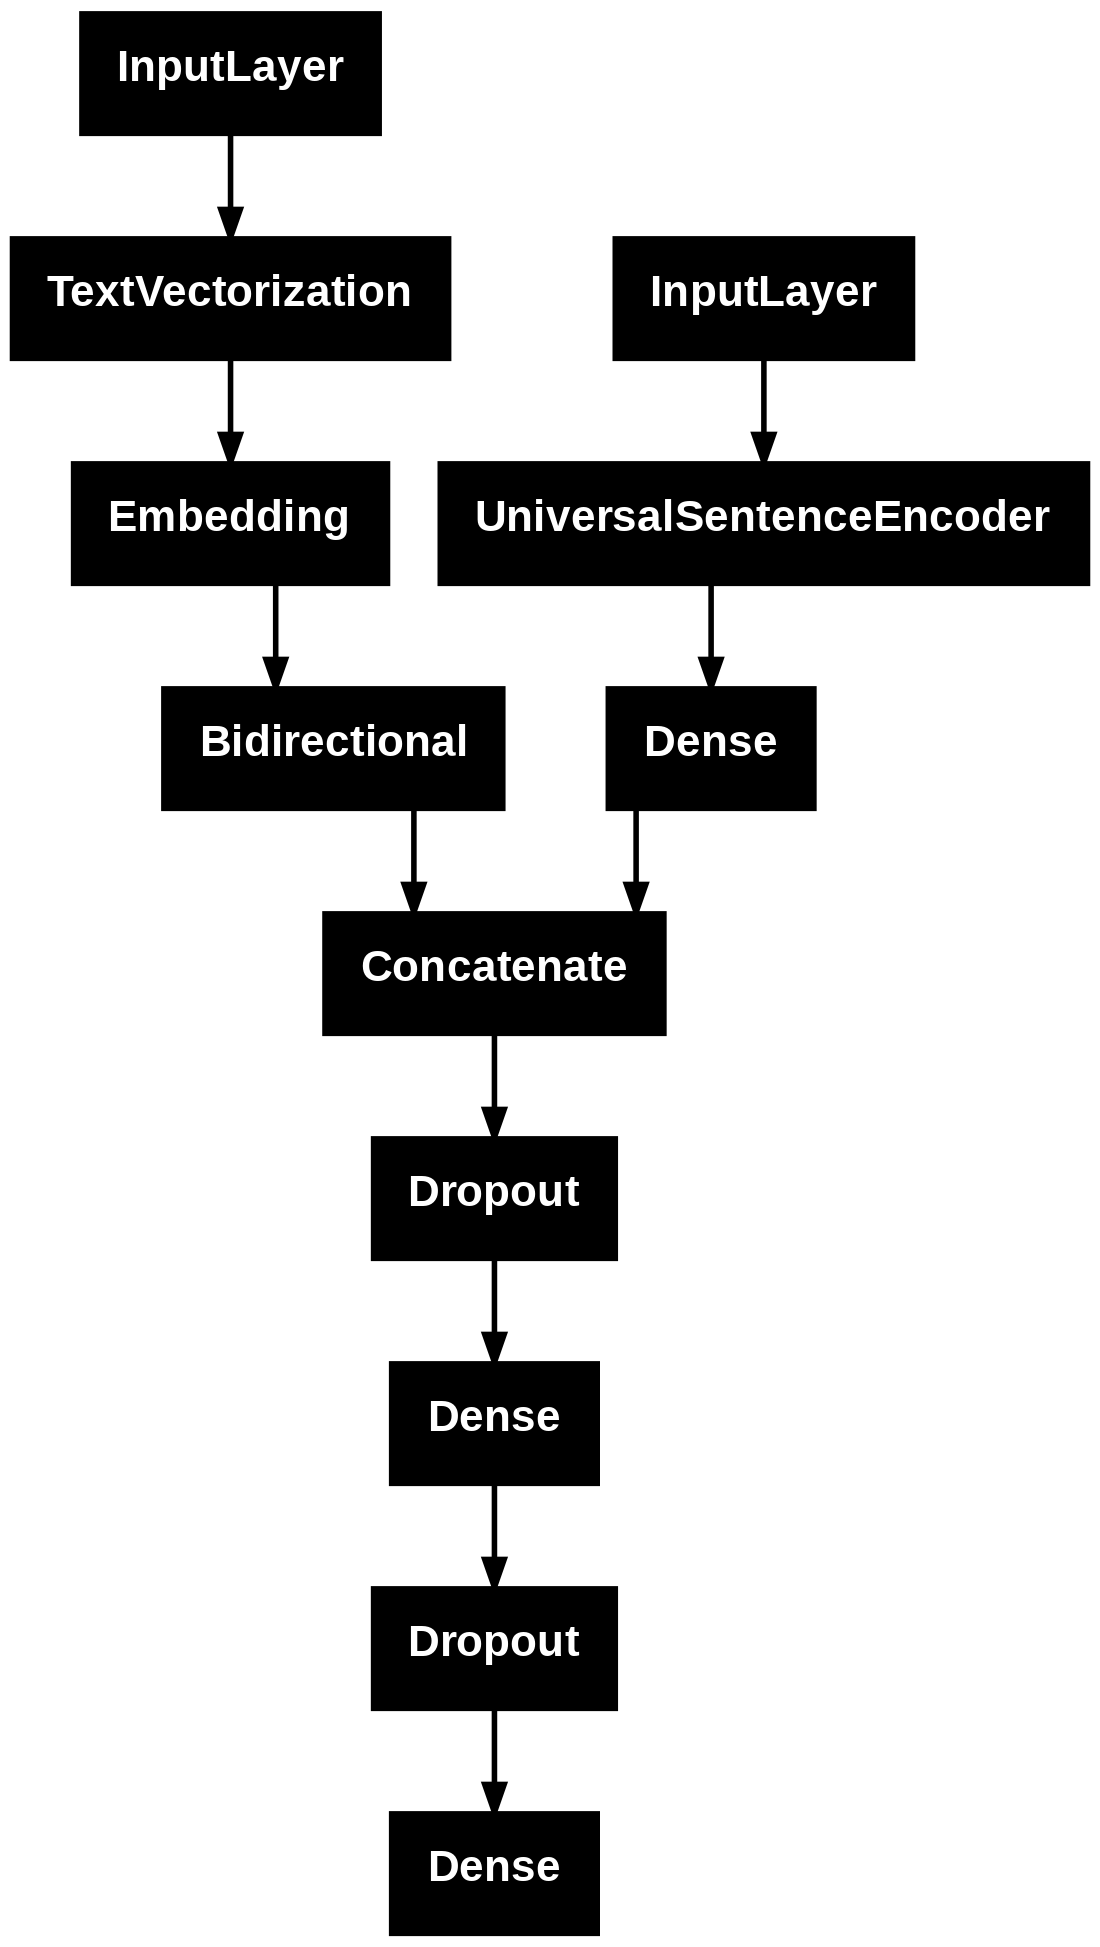

In [118]:
from tensorflow.keras.utils import plot_model
plot_model(model4)

In [119]:
train_mix_tokens = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
train_mix_labels = tf.data.Dataset.from_tensor_slices(train_labels_onehot)

train_mix_dataset = tf.data.Dataset.zip((train_mix_tokens,train_mix_labels))

train_mix_dataset = train_mix_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [120]:
val_mix_tokens = tf.data.Dataset.from_tensor_slices((val_sentences,val_chars))
val_mix_labels = tf.data.Dataset.from_tensor_slices(val_labels_onehot)

val_mix_dataset = tf.data.Dataset.zip((val_mix_tokens,val_mix_labels))

val_mix_dataset = val_mix_dataset.batch(32).prefetch(tf.data.AUTOTUNE)



In [121]:
history4 = model4.fit(train_mix_dataset,
                     validation_data = val_mix_dataset,
                     epochs = 5,
                     steps_per_epoch = int(0.1* len(train_mix_dataset)),
                     validation_steps = int(0.1 * len(val_mix_dataset)))

Epoch 1/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 134s 224ms/step - accuracy: 0.5289 - loss: 1.1502 - val_accuracy: 0.7064 - val_loss: 0.7827
Epoch 2/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 127s 226ms/step - accuracy: 0.6850 - loss: 0.8134 - val_accuracy: 0.7231 - val_loss: 0.7219
Epoch 3/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 128s 228ms/step - accuracy: 0.7020 - loss: 0.7761 - val_accuracy: 0.7347 - val_loss: 0.6892
Epoch 4/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 128s 227ms/step - accuracy: 0.7174 - loss: 0.7404 - val_accuracy: 0.7420 - val_loss: 0.6722
Epoch 5/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 128s 228ms/step - accuracy: 0.7209 - loss: 0.7360 - val_accuracy: 0.7453 - val_loss: 0.6687


In [122]:
acc4 = model4.evaluate(val_mix_dataset)

945/945 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.7463 - loss: 0.6645


In [123]:
model4_pred = model4.predict(val_mix_dataset)

945/945 ━━━━━━━━━━━━━━━━━━━━ 56s 58ms/step


In [124]:
model4_probs = tf.argmax(model4_pred, axis = 1)

In [125]:
model4_results = calculate_results(val_label_encoder, model4_probs)
model4_results

{'accuracy': 74.64583609161922,
 'precision': 0.7436232509890005,
 'recall': 0.7464583609161922,
 'f1': 0.7406969377017671}

In [126]:
acc4

[0.6656851768493652, 0.7464583516120911]

In [127]:
model4.save('model4.h5')

# **Model 5: Transfer Learning with pretrained token embeddings + character embeddings + positional embeddings**

In [128]:
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,To investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,A total of @ patients with primary knee OA wer...,1,11
2,METHODS,Outcome measures included pain reduction and i...,2,11
3,METHODS,Pain was assessed using the visual analog pain...,3,11
4,METHODS,Secondary outcome measures included the Wester...,4,11


In [129]:
train_df['line_number'].value_counts()

,count
line_number,
0,15000
1,15000
2,15000
3,15000
4,14992
5,14949
6,14758
7,14279
8,13346


<Axes: ylabel='Frequency'>

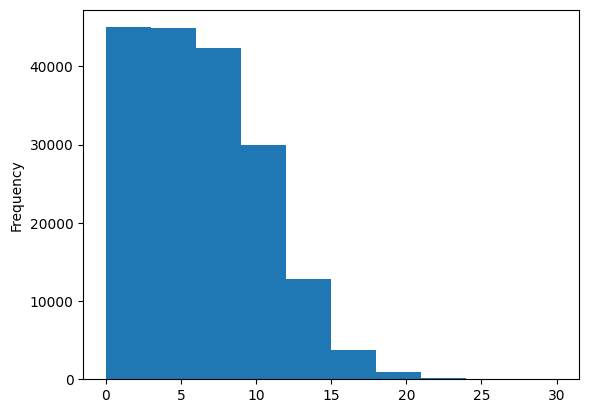

In [130]:
train_df.line_number.plot.hist()

In [131]:
np.percentile(train_df.line_number,98)

15.0

In [132]:
train_line_numbers_one_hot = tf.one_hot(train_df['line_number'].to_numpy(), depth = 15)


In [133]:
len(train_line_numbers_one_hot)

180040

In [134]:
(test_df.head())

,target,text,line_number,total_lines
0,BACKGROUND,This study analyzed liver function abnormaliti...,0,8
1,RESULTS,A post hoc analysis was conducted with the use...,1,8
2,RESULTS,Liver function tests ( LFTs ) were measured at...,2,8
3,RESULTS,Survival analyses were used to assess the asso...,3,8
4,RESULTS,The percentage of patients with abnormal LFTs ...,4,8


In [135]:
(val_df.head())

,target,text,line_number,total_lines
0,BACKGROUND,IgE sensitization to Aspergillus fumigatus and...,0,9
1,BACKGROUND,It is not clear whether these patients would b...,1,9
2,OBJECTIVE,We sought to determine whether a @-month cours...,2,9
3,METHODS,Asthmatic patients who were IgE sensitized to ...,3,9
4,METHODS,Primary outcomes were improvement in quality o...,4,9


In [136]:
test_line_numbers_one_hot = tf.one_hot(test_df['line_number'].to_numpy(),depth = 15)
val_line_numbers_one_hot = tf.one_hot(val_df['line_number'].to_numpy(), depth = 15)

In [137]:
len

<function len(obj, /)>

In [138]:
train_total_line_one_hot = tf.one_hot(train_df['total_lines'].to_numpy(),depth = 20)
test_total_line_one_hot = tf.one_hot(test_df['total_lines'].to_numpy(),depth = 20)
val_total_line_one_hot = tf.one_hot(val_df['total_lines'].to_numpy(),depth = 20)

In [139]:
# build a layer for tokens

token_inputs = layers.Input([], dtype = tf.string)
token_embed = UniversalSentenceEncoder()(token_inputs)
token_outputs = layers.Dense(128, activation = 'relu')(token_embed)
token_model = tf.keras.Model(token_inputs, token_outputs)

#build a layer for characters
char_inputs = layers.Input((1,), dtype = tf.string)
char_vec = char_vectorizer(char_inputs)
char_emb = char_embed(char_vec)
char_output = layers.Bidirectional(layers.LSTM(32))(char_emb)
char_model = tf.keras.Model(char_inputs, char_output)



# individual lines layer
line_input = layers.Input(shape= (15,), dtype = tf.int32)
line_output = layers.Dense(32,activation = 'relu')(line_input)
line_model = tf.keras.Model(line_input, line_output)

#total lines layer
total_line_input = layers.Input(shape = (20,), dtype = tf.int32)
total_line_output = layers.Dense(32, activation = 'relu')(total_line_input)
total_line_model = tf.keras.Model(total_line_input, total_line_output)

# concatinate the layers
conc_layer = layers.Concatenate()([token_model.output, char_model.output])

z = layers.Dense(256, activation = 'relu')(conc_layer)
z = layers.Dropout(0.5)(z)

z = layers.Concatenate()([line_model.output,total_line_model.output,z])

output_layer = layers.Dense(5, activation = 'softmax')(z)

final_model = tf.keras.Model([token_model.input,
                             char_model.input,
                             line_model.input,
                             total_line_model.input],
                             output_layer)

In [140]:
final_model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_5             │ (None)                 │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ text_vectorization_1      │ (None, 290)            │              0 │ input_layer_6[0][0]    │
│ (TextVectorization)       │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ universal_sentence_encod… │ (None, 512)            │              0 │ input_layer_5[0][0]    │
│ (UniversalSentenceEncode… │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 290, 25)        │          1,700 │ text_vectorization_1[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 128)            │         65,664 │ universal_sentence_en… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_1           │ (None, 64)             │         14,848 │ embedding_1[2][0]      │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 192)            │              0 │ dense_7[0][0],         │
│ (Concatenate)             │                        │                │ bidirectional_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_7             │ (None, 15)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_8             │ (None, 20)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 256)            │         49,408 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 32)             │            512 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 32)             │            672 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 256)            │              0 │ dense_10[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 320)            │              0 │ dense_8[0][0],         │
│ (Concatenate)             │                        │                │ dense_9[0][0],         │
│                      

 Total params: 134,409 (525.04 KB)

 Trainable params: 134,409 (525.04 KB)

 Non-trainable params: 0 (0.00 B)

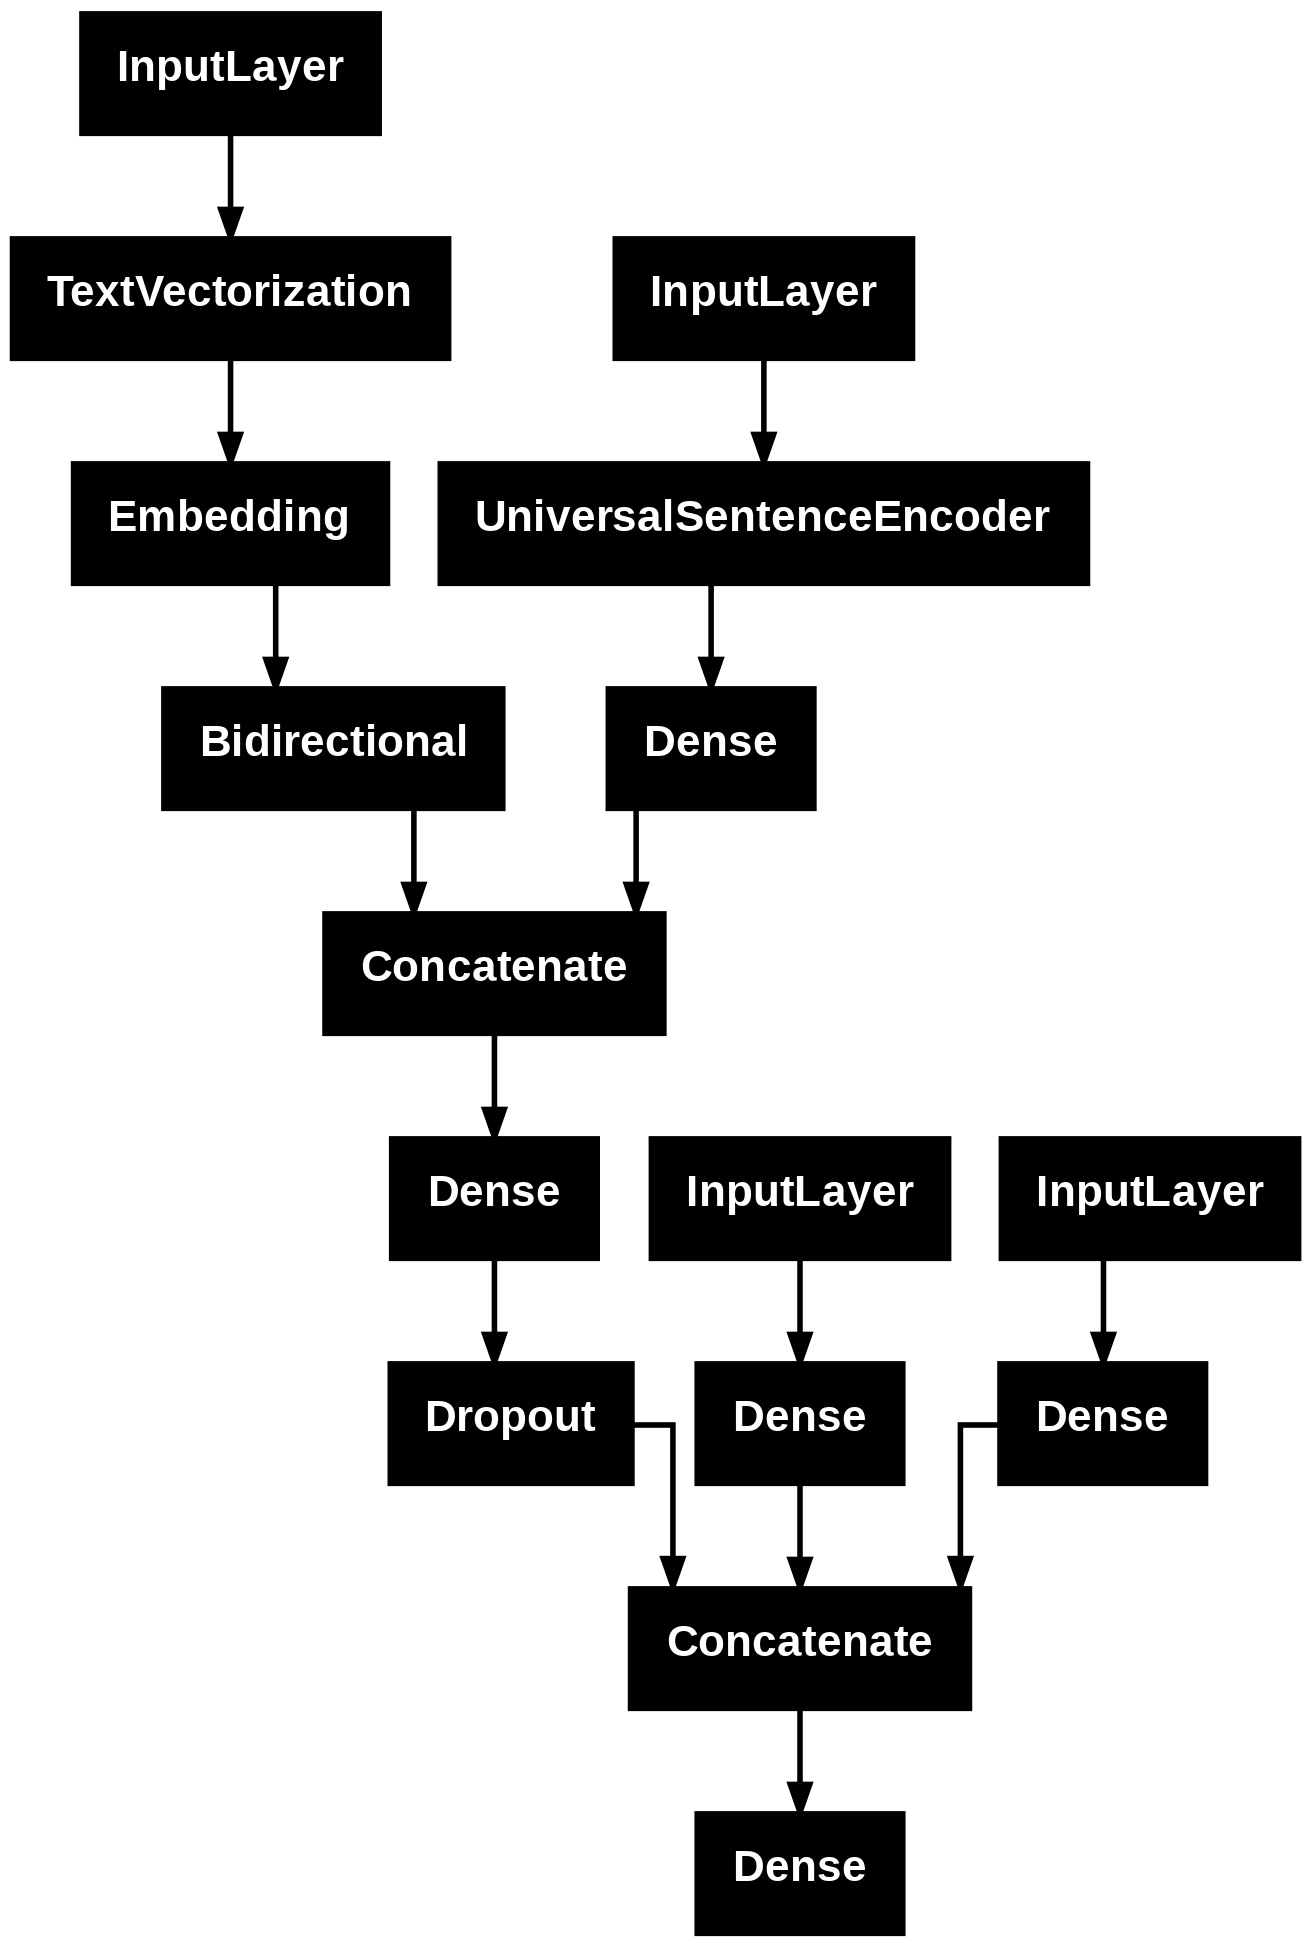

In [141]:
from tensorflow.keras.utils import plot_model
plot_model(final_model)

In [142]:
for layer in final_model.layers:
    print(f"{layer} trainable is {layer.trainable}")


<InputLayer name=input_layer_6, built=True> trainable is True
<InputLayer name=input_layer_5, built=True> trainable is True
<TextVectorization name=text_vectorization_1, built=True> trainable is True
<UniversalSentenceEncoder name=universal_sentence_encoder_2, built=True> trainable is True
<Embedding name=embedding_1, built=True> trainable is True
<Dense name=dense_7, built=True> trainable is True
<Bidirectional name=bidirectional_1, built=True> trainable is True
<Concatenate name=concatenate_1, built=True> trainable is True
<InputLayer name=input_layer_7, built=True> trainable is True
<InputLayer name=input_layer_8, built=True> trainable is True
<Dense name=dense_10, built=True> trainable is True
<Dense name=dense_8, built=True> trainable is True
<Dense name=dense_9, built=True> trainable is True
<Dropout name=dropout_2, built=True> trainable is True
<Concatenate name=concatenate_2, built=True> trainable is True
<Dense name=dense_11, built=True> trainable is True


In [143]:
final_model.compile(loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing = 0.2),
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ['accuracy'])

In [144]:
len(train_sentences), len(train_chars),len(train_line_numbers_one_hot),len(train_total_line_one_hot)

(180040, 180040, 180040, 180040)

In [145]:
train_final_mix = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars,train_line_numbers_one_hot,train_total_line_one_hot))
train_final_labels = tf.data.Dataset.from_tensor_slices(train_labels_onehot)

final_train_data = tf.data.Dataset.zip(train_final_mix,train_final_labels)
final_train_data = final_train_data.batch(32).prefetch(tf.data.AUTOTUNE)


In [146]:
test_final_mix = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars, test_line_numbers_one_hot, test_total_line_one_hot))
test_final_labels = tf.data.Dataset.from_tensor_slices(test_labels_onehot)

final_test_data = tf.data.Dataset.zip(test_final_mix, test_final_labels)
final_test_data = final_test_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [147]:
val_final_mix = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars, val_line_numbers_one_hot, val_total_line_one_hot))
val_final_labels = tf.data.Dataset.from_tensor_slices(val_labels_onehot)

final_val_data = tf.data.Dataset.zip(val_final_mix, val_final_labels)
final_val_data = final_val_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [148]:
final_train_data

<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [149]:
final_val_data

<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [150]:
history_final = final_model.fit(final_train_data,
                               validation_data = (final_val_data),
                               epochs = 5,
                               steps_per_epoch = int(0.1* len(final_train_data)),
                               validation_steps = int(0.1* len(final_val_data)))

Epoch 1/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 141s 238ms/step - accuracy: 0.6276 - loss: 1.2242 - val_accuracy: 0.8009 - val_loss: 0.9857
Epoch 2/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 133s 237ms/step - accuracy: 0.8113 - loss: 0.9724 - val_accuracy: 0.8208 - val_loss: 0.9416
Epoch 3/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 133s 236ms/step - accuracy: 0.8202 - loss: 0.9554 - val_accuracy: 0.8288 - val_loss: 0.9388
Epoch 4/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 132s 235ms/step - accuracy: 0.8319 - loss: 0.9414 - val_accuracy: 0.8364 - val_loss: 0.9301
Epoch 5/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 132s 235ms/step - accuracy: 0.8387 - loss: 0.9327 - val_accuracy: 0.8424 - val_loss: 0.9153


In [151]:
acc_5 = final_model.evaluate(final_test_data)

942/942 ━━━━━━━━━━━━━━━━━━━━ 56s 60ms/step - accuracy: 0.8345 - loss: 0.9341


In [152]:
model5_preds = final_model.predict(final_test_data)

942/942 ━━━━━━━━━━━━━━━━━━━━ 59s 61ms/step


In [153]:
model5_prds = tf.argmax(model5_preds, axis = 1)


In [154]:
final_model_results = calculate_results(test_label_encoder, model5_prds)
final_model_results

{'accuracy': 83.74979259996682,
 'precision': 0.8393798436862949,
 'recall': 0.8374979259996682,
 'f1': 0.8336773111384242}

In [155]:
acc_5

[0.9313308596611023, 0.8374979496002197]

In [156]:
final_model.save('finalmodel.h5')

# **Compare model Results**

In [157]:
compare_results = { 'base_model_results': base_line_results,
                   'model1_results': model1_results,
                   'model2_results': model2_results,
                   'model3_results': model3_results,
                   'model4_results' : model4_results,
                   'final_model_results': final_model_results

}

In [158]:
all_results = pd.DataFrame(compare_results)
all_results

,base_model_results,model1_results,model2_results,model3_results,model4_results,final_model_results
accuracy,71.667496,78.888336,72.852165,45.289530,74.645836,83.749793
precision,0.712432,0.787628,0.724330,0.408806,0.743623,0.839380
recall,0.716675,0.788883,0.728522,0.452895,0.746458,0.837498
f1,0.692510,0.785216,0.723252,0.410293,0.740697,0.833677


In [159]:
all_results = all_results.transpose()

In [160]:
all_results

,accuracy,precision,recall,f1
base_model_results,71.667496,0.712432,0.716675,0.692510
model1_results,78.888336,0.787628,0.788883,0.785216
model2_results,72.852165,0.724330,0.728522,0.723252
model3_results,45.289530,0.408806,0.452895,0.410293
model4_results,74.645836,0.743623,0.746458,0.740697
final_model_results,83.749793,0.839380,0.837498,0.833677


In [165]:
all_results['accuracy'] = all_results['accuracy']/100

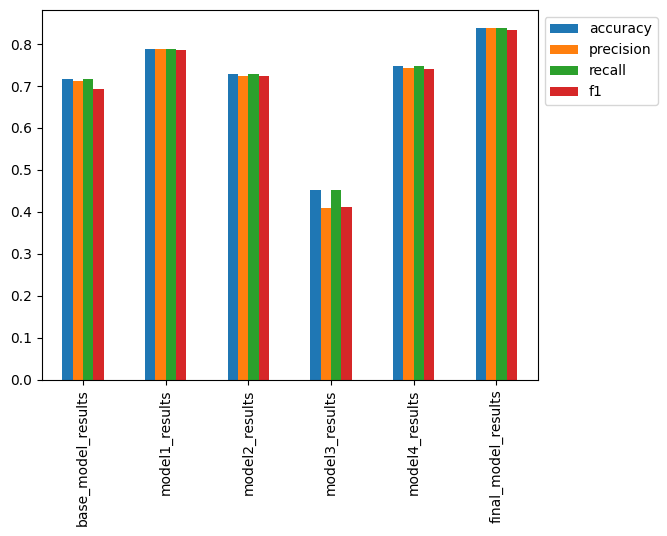

In [171]:
all_results.plot(kind = 'bar').legend(bbox_to_anchor = (1,1))

<Axes: >

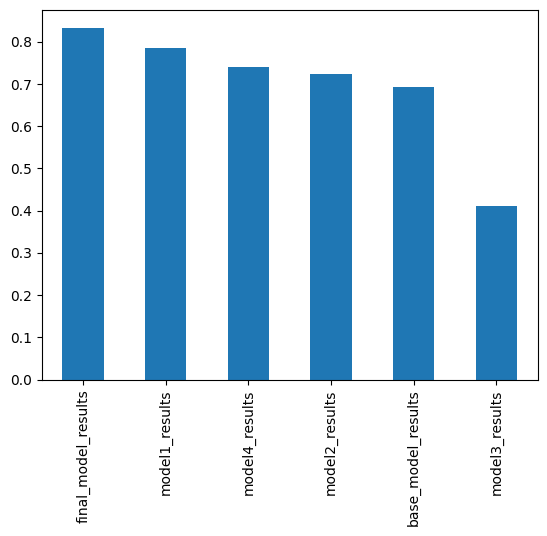

In [177]:
all_results['f1'].sort_values(ascending = False).plot(kind = 'bar')

# **Finding the most wrong predictions**

In [182]:
model5_prds

<tf.Tensor: shape=(30135,), dtype=int64, numpy=array([3, 2, 2, ..., 4, 4, 1])>

In [185]:
test_label_encoder

array([0, 4, 4, ..., 4, 4, 1])

In [190]:
model5_preds.max(axis = 1)

array([0.40792072, 0.45054516, 0.81335825, ..., 0.70067227, 0.68680626,
       0.43050215], dtype=float32)

In [186]:
labelenc.inverse_transform(model5_prds)

array(['OBJECTIVE', 'METHODS', 'METHODS', ..., 'RESULTS', 'RESULTS',
       'CONCLUSIONS'], dtype=object)

In [184]:
labelenc.inverse_transform(test_label_encoder)

array(['BACKGROUND', 'RESULTS', 'RESULTS', ..., 'RESULTS', 'RESULTS',
       'CONCLUSIONS'], dtype=object)

In [203]:
test_frame = {
    'test_sentences': test_sentences,
    'test_predictions': labelenc.inverse_transform(model5_prds),
    'Original_label' : labelenc.inverse_transform(test_label_encoder),
    'prediction_prob': model5_preds.max(axis = 1),

}

In [204]:
test_df = pd.DataFrame(test_frame)


In [205]:
test_df.head()

,test_sentences,test_predictions,Original_label,prediction_prob
0,This study analyzed liver function abnormaliti...,OBJECTIVE,BACKGROUND,0.407921
1,A post hoc analysis was conducted with the use...,METHODS,RESULTS,0.450545
2,Liver function tests ( LFTs ) were measured at...,METHODS,RESULTS,0.813358
3,Survival analyses were used to assess the asso...,METHODS,RESULTS,0.791942
4,The percentage of patients with abnormal LFTs ...,RESULTS,RESULTS,0.679303


In [206]:
test_df['prediction'] = test_df['test_predictions'] == test_df['Original_label']

In [207]:
test_df.head()

,test_sentences,test_predictions,Original_label,prediction_prob,prediction
0,This study analyzed liver function abnormaliti...,OBJECTIVE,BACKGROUND,0.407921,False
1,A post hoc analysis was conducted with the use...,METHODS,RESULTS,0.450545,False
2,Liver function tests ( LFTs ) were measured at...,METHODS,RESULTS,0.813358,False
3,Survival analyses were used to assess the asso...,METHODS,RESULTS,0.791942,False
4,The percentage of patients with abnormal LFTs ...,RESULTS,RESULTS,0.679303,True


In [214]:
new_test = test_df[test_df['prediction'] == False].sort_values(by = 'prediction_prob', ascending = False)

In [215]:
new_test.head()

,test_sentences,test_predictions,Original_label,prediction_prob,prediction
13874,Symptom outcomes will be assessed and estimate...,METHODS,CONCLUSIONS,0.958300,False
22375,Patients were randomly assigned to receive eit...,METHODS,RESULTS,0.943517,False
8545,Pretest-posttest .,BACKGROUND,METHODS,0.939021,False
6027,Patients were randomized in a Bayesian respons...,METHODS,RESULTS,0.937265,False
3573,A cluster randomised trial was implemented wit...,METHODS,RESULTS,0.937108,False


In [231]:
from sklearn.metrics import classification_report as cr
print(cr(labelenc.inverse_transform(test_label_encoder), labelenc.inverse_transform(model5_prds)))


              precision    recall  f1-score   support

  BACKGROUND       0.72      0.80      0.76      3621
 CONCLUSIONS       0.87      0.83      0.85      4571
     METHODS       0.83      0.94      0.88      9897
   OBJECTIVE       0.81      0.48      0.60      2333
     RESULTS       0.88      0.84      0.86      9713

    accuracy                           0.84     30135
   macro avg       0.82      0.78      0.79     30135
weighted avg       0.84      0.84      0.83     30135



In [230]:
import random


In [225]:
k = random.randint(0,100)
for sentence in list(new_test.itertuples())[k:k+5]:
  _, sen, pred, ori, prob,predi = sentence
  print(f'{sen}\n')
  print(f"is predicted {pred}\n")
  print(f"but is {ori}\n\n")
  # break

The primary endpoint was a composite of cardiovascular morbidity and mortality .

is predicted METHODS

but is RESULTS


The primary outcome was BP control , and secondary outcomes were mean changes in systolic and diastolic BPs at @ months , assessed with an automated BP device .

is predicted METHODS

but is RESULTS


We will examine patients with preexisting mass effects and midline shift undergoing elective supratentorial brain tumor surgery .

is predicted METHODS

but is BACKGROUND


For each individual enrolled as a case , we identified up to four individuals as controls matched on age , sex , kidney disease , and use of various diuretic classes .

is predicted METHODS

but is RESULTS


The primary endpoint was change from baseline in @-hour weighted mean forced expiratory volume in @second after @weeks of treatment vs. placebo .

is predicted METHODS

but is BACKGROUND


